<a href="https://colab.research.google.com/github/saipanyamprudhvi/-Reproducible-Research/blob/main/demo/inference_for_sparse_yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_sparse_yolov5.ipynb)

## 0. Preperation

- Install latest version of SAHI and DeepSparse:

In [1]:
pip install sahi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 4.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=2d0125b49fb770515c327c95c10922030940371d0f369af2d5d2367bbec6e808
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


In [2]:
%%bash
git clone https://github.com/neuralmagic/deepsparse.git
cd deepsparse
python setup.py install

Loaded version 1.8.0 from /content/deepsparse/src/deepsparse/version.py
Checking to see if /content/deepsparse/src/deepsparse/arch.bin exists.. False
Unable to find wand binaries locally in /content/deepsparse/src/deepsparse.
Pulling down from artifact store for wand nightly 1.8.0
Requesting https://artifacts.neuralmagic.com/nightly/wand_nightly-1.8.0-cp310-cp310-manylinux_x86_64.tar.gz
running install
running build
running build_py
creating build/lib/deepsparse
copying src/deepsparse/cpu.py -> build/lib/deepsparse
copying src/deepsparse/analyze.py -> build/lib/deepsparse
copying src/deepsparse/__init__.py -> build/lib/deepsparse
copying src/deepsparse/subgraph_execute.py -> build/lib/deepsparse
copying src/deepsparse/analytics.py -> build/lib/deepsparse
copying src/deepsparse/generated_version.py -> build/lib/deepsparse
copying src/deepsparse/version.py -> build/lib/deepsparse
copying src/deepsparse/pipeline.py -> build/lib/deepsparse
copying src/deepsparse/tasks.py -> build/lib/deeps

Cloning into 'deepsparse'...
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/command/build_py.py:218: _Warning: Package 'deepsparse.avx2' is absent from the `packages` configuration.
!!

        ********************************************************************************
        ############################
        # Package would be ignored #
        ############################
        Python recognizes 'de

- Import required modules:

In [3]:
pip install sparseml[torch,torchvision]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.4/109.4 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.0/409.0 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.8/177.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 71.5 MB/s eta 0:00:00
   ━━━━━

In [6]:
pip install fiftyone imantics

  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 942.9/942.9 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 80.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deepsparse-nightly 1.8.0 requires sparsezoo-nightly~=1.8.0, which is not installed.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.2.1 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.1 which is incompatible.
langchain 0.3.12 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.2.1 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.2.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22

In [7]:
# import required functions, classes
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

- Download a yolov5 model and two test images:

In [8]:
# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a YOLOv5 Model

- Instantiate a detection model by defining model weight path and other parameters:

In [9]:
model_path = "zoo:cv/detection/yolov5-s/pytorch/ultralytics/coco/pruned-aggressive_96"
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov5sparse',
    confidence_threshold=0.3,
    image_size = 640,
    model_path = model_path ,
    device="cpu", # or 'cuda:0'
)

2025-01-03 17:51:38 deepsparse.pipeline WARNING  Could not create v2 'yolo' pipeline, trying legacy
Combining Chunks: 100%|██████████| 8.22M/8.22M [00:00<00:00, 485MB/s]


- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [10]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

In [11]:
result.object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(321.60010156631466, 322.656777381897, 384.6830580711365, 362.838267326355), w: 63.08295650482182, h: 40.18148994445801>,
    mask: None,
    score: PredictionScore: <value: 0.8379095196723938>,
    category: Category: <id: 2, name: car>>

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [12]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

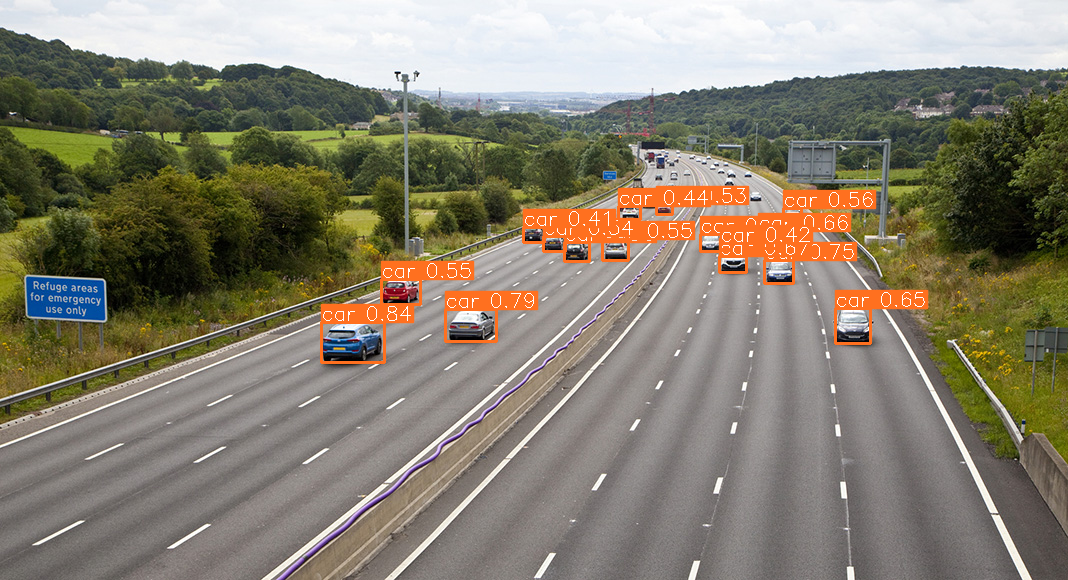

In [13]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a YOLOv5 Model and DeepSparse

[DeepSparse](https://neuralmagic.com/deepsparse/) is an inference runtime offering GPU-class performance on CPUs and APIs to integrate ML into your application. Sparsification is a powerful technique for optimizing models for inference, reducing the compute needed with a limited accuracy tradeoff.

DeepSparse is designed to take advantage of model sparsity, enabling you to deploy models with the flexibility and scalability of software on commodity CPUs with the best-in-class performance of hardware accelerators, enabling you to standardize operations and reduce infrastructure costs.

Similar to Hugging Face, DeepSparse provides off-the-shelf pipelines for computer vision and NLP that wrap the model with proper pre- and post-processing to run performantly on CPUs by using sparse models.

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [14]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 slices.


- Visualize predicted bounding boxes and masks over the original image:

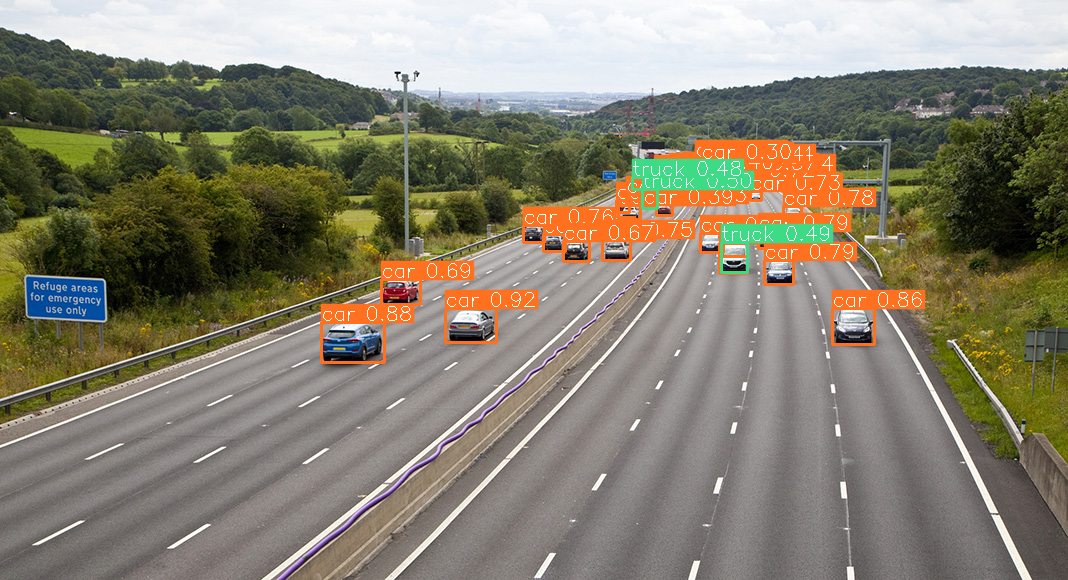

In [15]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [16]:
object_prediction_list = result.object_prediction_list

In [17]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(445.2277759552002, 308.79759521484374, 496.71152458190915, 342.3387084960938), w: 51.48374862670897, h: 33.541113281250034>,
    mask: None,
    score: PredictionScore: <value: 0.9190992116928101>,
    category: Category: <id: 2, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [18]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [445.2277759552002,
   308.79759521484374,
   51.48374862670897,
   33.541113281250034],
  'score': 0.9190992116928101,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1726},
 {'image_id': None,
  'bbox': [321.60010156631466,
   322.20928955078125,
   63.08295650482182,
   40.75953369140626],
  'score': 0.8782771825790405,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2571},
 {'image_id': None,
  'bbox': [832.6520965576171,
   308.548193359375,
   41.71009826660156,
   36.04396057128906],
  'score': 0.8638253211975098,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1503}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [19]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [445.2277759552002,
   308.79759521484374,
   51.48374862670897,
   33.541113281250034],
  'score': 0.9190992116928101,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1726},
 {'image_id': 1,
  'bbox': [321.60010156631466,
   322.20928955078125,
   63.08295650482182,
   40.75953369140626],
  'score': 0.8782771825790405,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2571},
 {'image_id': 1,
  'bbox': [832.6520965576171,
   308.548193359375,
   41.71009826660156,
   36.04396057128906],
  'score': 0.8638253211975098,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1503}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [20]:
result.to_imantics_annotations()[:3]

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [21]:
result.to_fiftyone_detections()[:3]

[<Detection: {
     'id': '6778240f6538d4ea333af55c',
     'attributes': {},
     'tags': [],
     'label': 'car',
     'bounding_box': [
         0.416879940032959,
         0.5324096469221444,
         0.04820575714111327,
         0.05782950565732765,
     ],
     'mask': None,
     'mask_path': None,
     'confidence': 0.9190992116928101,
     'index': None,
 }>,
 <Detection: {
     'id': '6778240f6538d4ea333af55d',
     'attributes': {},
     'tags': [],
     'label': 'car',
     'bounding_box': [
         0.30112369060516353,
         0.5555332578461746,
         0.0590664386749268,
         0.07027505808863148,
     ],
     'mask': None,
     'mask_path': None,
     'confidence': 0.8782771825790405,
     'index': None,
 }>,
 <Detection: {
     'id': '6778240f6538d4ea333af55e',
     'attributes': {},
     'tags': [],
     'label': 'car',
     'bounding_box': [
         0.7796367945296041,
         0.5319796437230603,
         0.039054399126031425,
         0.0621447596056708,
   

## 4. Batch Prediction

- Set model and directory parameters:

In [22]:
model_type = "yolov5sparse"
model_device = "cpu" # or 'cuda:0'
model_confidence_threshold = 0.4

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [23]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

2025-01-03 17:53:29 deepsparse.pipeline WARNING  Could not create v2 'yolo' pipeline, trying legacy


There are 3 listed files in folder: demo_data/


Performing inference on images:   0%|          | 0/3 [00:00<?, ?it/s]

Performing prediction on 15 slices.


Performing inference on images:  33%|███▎      | 1/3 [00:06<00:12,  6.02s/it]

Prediction time is: 5940.92 ms
Performing prediction on 20 slices.


Performing inference on images:  67%|██████▋   | 2/3 [00:12<00:05,  5.99s/it]

Prediction time is: 5887.19 ms
Performing prediction on 15 slices.


Performing inference on images: 100%|██████████| 3/3 [00:17<00:00,  5.74s/it]

Prediction time is: 5126.04 ms
Prediction results are successfully exported to runs/predict/exp
